#### Imports 

In [1]:
from budget import gen_budget_data

C:\lightning-gym\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\lightning-gym\venv\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\lightning-gym\venv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
Using backend: pytorch


#### Generate results by budget

training
	episodes = 0
env
	budget = 10
	node_id = 
	repeat = True
	cutoff = 20
	n = 128
	graph_type = scale_free
	seed = 5785
agent
	load_model = True
	model_file = mbi_net.pt
	cuda = False
	in_features = 1
	hid_features = 128
	out_features = 128
	gamma = 0.99
	layers = 2
edge_filters
	minimum_capacity = 0
	maximum_capacity = 1_000_000_000_000
graph_filters
	remove_bridges = True
	combine_multiedges = True
seed set
Testing budget 2 complete.
Testing budget 3 complete.
Testing budget 4 complete.
Testing budget 5 complete.
Testing budget 6 complete.
Testing budget 7 complete.
Testing budget 8 complete.


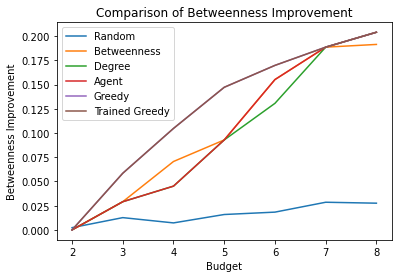

In [2]:
gen_budget_data()